<a href="https://colab.research.google.com/github/wnoyan/Machine-Learning/blob/master/Applying%20KNN%20Classifier%20on%20Iris%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Required Libraries

In [ ]:
# Loading Required Libraries
import numpy as np 
import pandas as pd 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree

## Exploring Iris Dataset

In [ ]:
# Loading Datasets 
iris_data = load_iris() 
iris = pd.DataFrame(iris_data.data)
iris_targets = pd.DataFrame(iris_data.target)

# Priting Features Name of Iris Data 
print ("Features Name : ", iris_data.feature_names) 

# Priting Targets Name of Iris Data 
print ("Targets Name : ", iris_data.target_names) 

# Shape of Datasets 
print ("Dataset Shape: ", iris.shape) 

# First Five Sample features
print ("Dataset: ",iris.head())  

# First Five Sample Targets
print ("Dataset: ",iris_targets.head()) 

Features Name :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets Name :  ['setosa' 'versicolor' 'virginica']
Dataset Shape:  (150, 4)
Dataset:       0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
Dataset:     0
0  0
1  0
2  0
3  0
4  0


## Splitting Dataset into training and testing sets

In [ ]:
# Features and Targets
X = iris_data.data
Y = iris_data.target

# Splitting the Dataset into Training and Testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

## Normalizing the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train[0:4,:]

array([[-1.47393679,  1.20365799, -1.56253475, -1.31260282],
       [-0.13307079,  2.99237573, -1.27600637, -1.04563275],
       [ 1.08589829,  0.08570939,  0.38585821,  0.28921757],
       [-1.23014297,  0.75647855, -1.2187007 , -1.31260282]])

## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting

In [ ]:
Y_pred = KNN.predict(X_test)

## Accuracy & Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

#Accuray of the Model 
print("Accuracy:", accuracy_score(y_test, Y_pred)*100, "%")
print(confusion_matrix(y_test, Y_pred))

Accuracy: 100.0 %
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## Calculating Error for K Values

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    print(np.mean(pred_i != y_test))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.03333333333333333
0.0
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.06666666666666667
0.03333333333333333
0.03333333333333333


## Plotting Error for K Values

Text(0, 0.5, 'Mean Error')

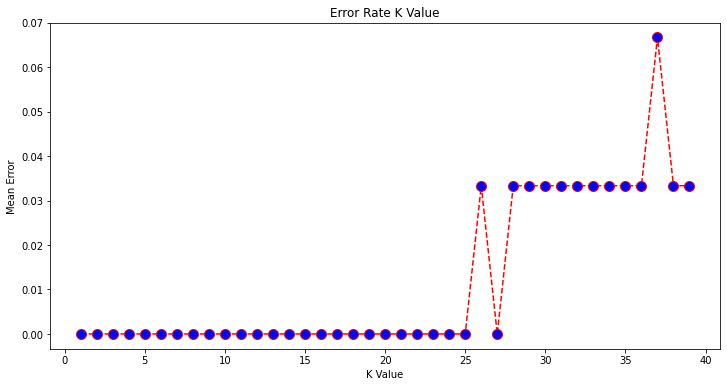

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')